In [4]:
# Import the necessary libraries 

import numpy as np
import pandas as pd
import os


In [5]:
# Check to see if the required files are available in the given path.

l="C:\\Users\\manoj\\Documents\\Manoj_own\\ML_Projects\\data\\IPL"
print(os.listdir(l))

['deliveries.csv', 'deliveries.zip', 'matches.csv', 'test.json']


In [6]:
# Create matches and deliveries DataFrames

matches = pd.read_csv("C:\\Users\\manoj\\Documents\\Manoj_own\\ML_Projects\\data\\IPL\\matches.csv")
deliveries = pd.read_csv("C:\\Users\\manoj\\Documents\\Manoj_own\\ML_Projects\\data\\IPL\\deliveries.csv")

In [7]:
# Check the first few records of the matches DataFrame
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [8]:
# Check the first few records of the deliveries DataFrame

deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [9]:
# Check the number of rows and columns in matches dataset
matches.shape

(636, 18)

In [10]:
# Check the number of rows and columns in deliveries dataset
deliveries.shape

(150460, 21)

In [11]:
# Check if there are any null value columns.

matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

From the above result, it is clear that city, winner, player_of_match, umpire1, umpire2 and umpire3 columns have null values. But "umpire3" entirely is null. Matches dataset has 636 rows and "umpire3" column has 636 missing values, which means, "umpire3" column does not have any value. So, "umpire3" colum can be dropped.

In [12]:
# Drop Umpire3 column from matches dataframe.

matches.drop(['umpire3'],axis=1,inplace=True)

In [13]:
# Validate to see the umpire3 column has been dropped.

matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

### What are all the teams played in IPL



In [14]:
# Get unique teams in 'team1' column
matches['team1'].unique()

# Get unique teams in 'team2' column
matches['team2'].unique()

# Contatenate the unique teams in 'team1' and 'team2' columns
np.concatenate((matches['team1'].unique(), matches['team2'].unique()), axis=0)

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants'], dtype=object)

In [15]:
# Get the unique teams from the combination of 'team1' and 'team2' columns.

np.unique(np.concatenate((matches['team1'].unique(), matches['team2'].unique()), axis=0))

array(['Chennai Super Kings', 'Deccan Chargers', 'Delhi Daredevils',
       'Gujarat Lions', 'Kings XI Punjab', 'Kochi Tuskers Kerala',
       'Kolkata Knight Riders', 'Mumbai Indians', 'Pune Warriors',
       'Rajasthan Royals', 'Rising Pune Supergiant',
       'Rising Pune Supergiants', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad'], dtype=object)

In [16]:
# How many unique teams have played IPL till now?

len(np.unique(np.concatenate((matches['team1'].unique(), matches['team2'].unique()), axis=0)))

14

There are 14 unique teams played in IPL from 2008 till 2017. Though it shows 14, it is actually 13 since 'Rising Pune Supergiant' and 'Rising Pune Supergiants' are both same.

In [17]:
# What are the seasons available to us?
np.sort(matches['season'].unique())

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype=int64)

We have data of IPL starting from 2008 till 2017.

In [18]:
# Modify the team names in matches DataFrame to their short forms.
# Note that 'Rising Pune Supergiant' and 'Rising Pune Supergiants' has been named to 'RPS' since they are same.

matches.replace(['Chennai Super Kings', 'Deccan Chargers', 'Delhi Daredevils',
       'Gujarat Lions', 'Kings XI Punjab', 'Kochi Tuskers Kerala',
       'Kolkata Knight Riders', 'Mumbai Indians', 'Pune Warriors',
       'Rajasthan Royals', 'Rising Pune Supergiant',
       'Rising Pune Supergiants', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad'],
               ['CSK', 'DC', 'DD', 'GL', 'KXIP', 'KTK', 'KKR', 'MI', 'PW', 'RR', 'RPS', 'RPS', 'RCB', 'SRH'],inplace=True)


In [19]:
# Modify the team names in deliveries DataFrame to their short forms.

deliveries.replace(['Chennai Super Kings', 'Deccan Chargers', 'Delhi Daredevils',
       'Gujarat Lions', 'Kings XI Punjab', 'Kochi Tuskers Kerala',
       'Kolkata Knight Riders', 'Mumbai Indians', 'Pune Warriors',
       'Rajasthan Royals', 'Rising Pune Supergiant',
       'Rising Pune Supergiants', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad'],
               ['CSK', 'DC', 'DD', 'GL', 'KXIP', 'KTK', 'KKR', 'MI', 'PW', 'RR', 'RPS', 'RPS', 'RCB', 'SRH'],inplace=True)

# Start analyzing the data

In [20]:
print("Total Matches played: ", matches.shape[0])
print(" \n Cities Played at: ", matches['city'].dropna().unique())
print(" \n Unique teams played: ",np.unique(np.concatenate((matches['team1'].unique(), matches['team2'].unique()), axis=0)))
print(" \n Number of Unique teams played: ", len(matches['team1'].unique()))

Total Matches played:  636
 
 Cities Played at:  ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah']
 
 Unique teams played:  ['CSK' 'DC' 'DD' 'GL' 'KKR' 'KTK' 'KXIP' 'MI' 'PW' 'RCB' 'RPS' 'RR' 'SRH']
 
 Number of Unique teams played:  13


In [22]:
# Cities which have provided venues for IPL across seasons.

matches['city'].dropna().unique()


array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion', 'East London',
       'Johannesburg', 'Kimberley', 'Bloemfontein', 'Ahmedabad', 'Cuttack',
       'Nagpur', 'Dharamsala', 'Kochi', 'Visakhapatnam', 'Raipur',
       'Ranchi', 'Abu Dhabi', 'Sharjah'], dtype=object)

In [24]:
print("Venues for IPL Matches: \n", matches['venue'].unique())

Venues for IPL Matches: 
 ['Rajiv Gandhi International Stadium, Uppal'
 'Maharashtra Cricket Association Stadium'
 'Saurashtra Cricket Association Stadium' 'Holkar Cricket Stadium'
 'M Chinnaswamy Stadium' 'Wankhede Stadium' 'Eden Gardens'
 'Feroz Shah Kotla' 'Punjab Cricket Association IS Bindra Stadium, Mohali'
 'Green Park' 'Punjab Cricket Association Stadium, Mohali'
 'Sawai Mansingh Stadium' 'MA Chidambaram Stadium, Chepauk'
 'Dr DY Patil Sports Academy' 'Newlands' "St George's Park" 'Kingsmead'
 'SuperSport Park' 'Buffalo Park' 'New Wanderers Stadium'
 'De Beers Diamond Oval' 'OUTsurance Oval' 'Brabourne Stadium'
 'Sardar Patel Stadium, Motera' 'Barabati Stadium'
 'Vidarbha Cricket Association Stadium, Jamtha'
 'Himachal Pradesh Cricket Association Stadium' 'Nehru Stadium'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Subrata Roy Sahara Stadium'
 'Shaheed Veer Narayan Singh International Stadium'
 'JSCA International Stadium Complex' 'Sheikh Zayed Stadium'
 'Sharjah Cr

In [26]:
print("Number of Unique Venues for IPL Matches: ", matches['venue'].nunique())

Number of Unique Venues for IPL Matches:  35


In [27]:
print("Number of Unique cities hosted IPL Matches: ", matches["city"].nunique())

Number of Unique cities hosted IPL Matches:  30


In [28]:
#  Which team has won the toss most times.
matches['toss_winner'].value_counts()

MI      85
KKR     78
DD      72
RCB     70
KXIP    68
CSK     66
RR      63
DC      43
SRH     35
PW      20
GL      15
RPS     13
KTK      8
Name: toss_winner, dtype: int64

In [29]:
matches['toss_winner'].value_counts().idxmax()

'MI'

Mumbai Indians has won the toss most of the times through out the IPL history.

In [31]:
# Which team has won the match most times.

most_match_winnning_team = matches['winner'].value_counts().idxmax()
print("{} has won IPL matches most number of times.".format(most_match_winnning_team))

MI has won IPL matches most number of times.


In [32]:
# Which city has hosted most IPL matches

most_matches_hosting_city = matches['city'].value_counts().idxmax()
print("{} has hosted most IPL matches.".format(most_matches_hosting_city))

Mumbai has hosted most IPL matches.


In [35]:
# Who has won player of the match most?

most_times_player = matches['player_of_match'].value_counts().idxmax()
print("'{}' was the 'player of match' most times".format(most_times_player))

'CH Gayle' was the 'player of match' most times


In [36]:
# What are the teams in a match that was won by most runs.

matches.iloc[[matches['win_by_runs'].idxmax()]]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
43,44,2017,Delhi,2017-05-06,MI,DD,DD,field,normal,0,MI,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan


In [38]:
# Finding Maximum difference of runs by which a team has won on another from all the seasons.

print("The maximum difference of runs by which a team has won on another across seasons is {}".format(matches['win_by_runs'].max()))

The maximum difference of runs by which a team has won on another across seasons is 146


In [39]:
# Finding maximum win_by_runs from all seasons
# Showing only few columns for that row.

wbr = matches.iloc[[matches['win_by_runs'].idxmax()]]
wbr[['season', 'team1', 'team2', 'toss_winner', 'winner','win_by_wickets', 'win_by_runs']]

,season,team1,team2,toss_winner,winner,win_by_wickets,win_by_runs
43,2017,MI,DD,DD,MI,0,146


MI has won with a difference of 146 runs over DD during the 2017 season of IPL. This is the maximum win by runs record till 2017 IPL.

In [40]:
# Finding maximum win_by_wickets from all seasons.
# Showing only few columns for that row.

wbw = matches.iloc[[matches['win_by_wickets'].idxmax()]]
wbw[['season', 'team1', 'team2', 'toss_winner', 'winner', 'win_by_wickets', 'win_by_runs']]


,season,team1,team2,toss_winner,winner,win_by_wickets,win_by_runs
2,2017,GL,KKR,KKR,KKR,10,0


KKR has won with a difference of 10 wickets against GL during the 2017 season of IPL. This is the maximum win by wickets records till 2017 IPL.

# Visualizing results with Altair

In [41]:
# Import Altair library

import altair as alt


In [42]:
# Enable the altair notebook renderer to display the grpahs in the notebook itself.

alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

   ## Number of Matches played in each season

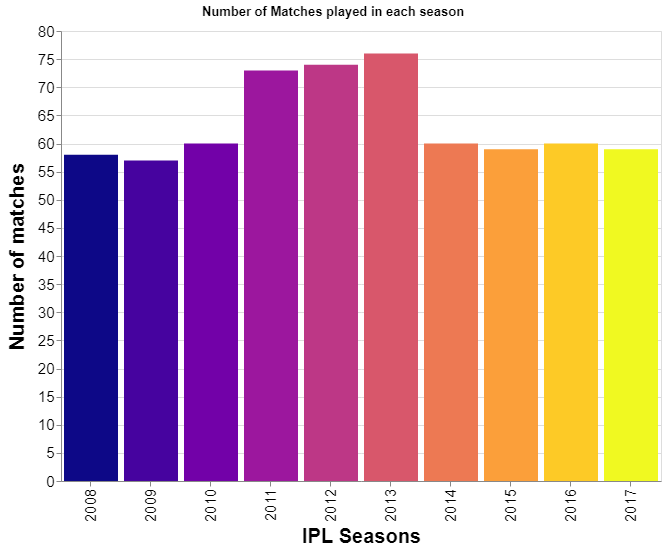

In [50]:
# IPL season-wise matches count displayed as bar chart using Altair

alt.Chart(matches).mark_bar().encode(
# alt.X('season:N', scale=alt.Scale(rangeStep=50), axis=alt.Axis(title='IPL Seasons')),
    alt.X('season:N', axis=alt.Axis(title='IPL Seasons')),
    alt.Y('count(id)', axis=alt.Axis(title='Number of matches')),
    alt.Tooltip('count()', title='count'),
    color=alt.Color('season', scale=alt.Scale(scheme='plasma'), legend=None),
).configure_axis(
    domainWidth=1,
    titleFontSize=20,
    labelFontSize=15
    
).properties(
    height=450,
    width=600,
    title='Number of Matches played in each season').interactive()

# Toss Decisions across IPL Seasons

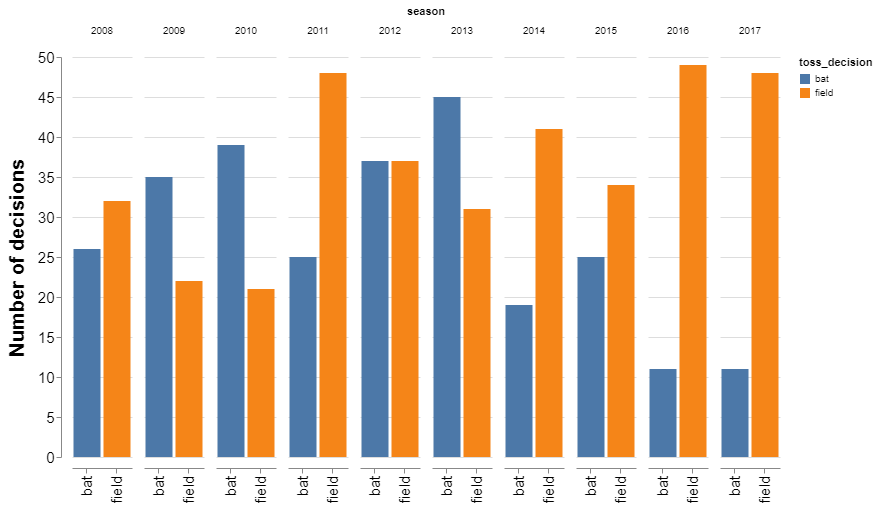

In [54]:
# Toss Decisions across IPL Seasons

alt.Chart(matches).mark_bar().encode(
    alt.X('toss_decision', axis=alt.Axis(title='')),
    alt.Y('count(id)', axis=alt.Axis(title='Number of decisions')),
    column='season',
    color='toss_decision',
    tooltip=[alt.Tooltip('season', title='Season'), alt.Tooltip('toss_decision', title='Toss Decision'),alt.Tooltip('count(id)', title='No.of Toss Decisions')]
).configure_axis(
    domainWidth=1,
    titleFontSize=20,
    labelFontSize=15
    
).properties(height=400, width=60).interactive(bind_y=False
                                              ).configure_view(
                                                stroke='transparent'
)

In [46]:
# Validate above result by finding the number of "field" and "bat" toss_decisions 
matches.loc[(matches['season']==2008) & (matches['toss_decision']=='field')].shape

(32, 17)

In [47]:
matches.loc[(matches['season']==2008) & (matches['toss_decision']=='bat')].shape

(26, 17)

## Maximum Toss Winners across Seasons

In [48]:
matches['toss_winner'].value_counts()

MI      85
KKR     78
DD      72
RCB     70
KXIP    68
CSK     66
RR      63
DC      43
SRH     35
PW      20
GL      15
RPS     13
KTK      8
Name: toss_winner, dtype: int64

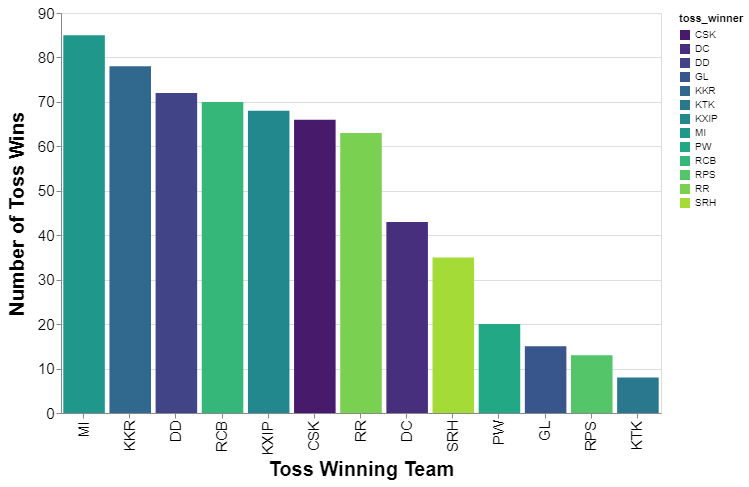

In [55]:
# Toss winners across IPL Seasons

alt.Chart(matches).mark_bar().encode(
    alt.X('toss_winner', sort=alt.SortField(field='count():Q', op='count', order='descending'), axis=alt.Axis(title='Toss Winning Team')),
    alt.Y('count()', axis=alt.Axis(title='Number of Toss Wins')),
    color = alt.Color('toss_winner', scale=alt.Scale(scheme='viridis')),
    order = alt.Order( 'count()', sort = 'ascending'),
    tooltip = [alt.Tooltip('toss_winner', title='Toss Winner'), alt.Tooltip('count(id)', title='No. of Times')]
).configure_axis(
    domainWidth=1,
    labelFontSize=15,
    titleFontSize=20
).properties(height=400, width=600
            ).interactive()

### Total Matches vs Number of Matches Won

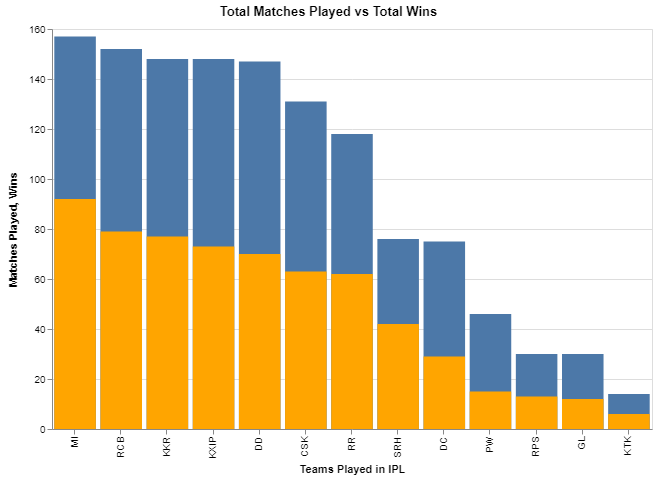

In [57]:
mpt = pd.concat([matches['team1'], matches['team2']])
mpt = mpt.value_counts().reset_index()
mpt.columns = ['Team', 'Number_of_matches_played']
mpt['wins']=matches['winner'].value_counts().reset_index()['winner']

total_matches_played = alt.Chart(mpt).mark_bar().encode(
    alt.X('Team',axis=alt.Axis(title='Teams Played in IPL'), sort=alt.SortField(field='Number_of_matches_played:Q', op='count', order='ascending')),  
    alt.Y('Number_of_matches_played:Q', axis=alt.Axis(title='Matches Played') ),
    tooltip=['Team', alt.Tooltip('sum(Number_of_matches_played)', title='Total Matches Played')],
).properties(height=400, width=600)

wins = alt.Chart(mpt).mark_bar(color='orange').encode(
    alt.X('Team',axis=alt.Axis(title='Teams Played in IPL'), sort=alt.SortField(field='Number_of_matches_played:Q', op='count', order='ascending')), 
    alt.Y('wins', axis=alt.Axis(title='Wins')), 
    tooltip=['Team', alt.Tooltip('sum(wins)', title='Matches Won')],
).properties(height=400, width=600)

alt.layer(total_matches_played, wins, title='Total Matches Played vs Total Wins')

# Runs scored across IPL seasons

In [58]:

deliveries_by_season = matches[['id', 'season']].merge(deliveries, left_on='id', right_on='match_id', how='left').drop('id', axis=1)


In [59]:

runsBySeason = deliveries_by_season.groupby(['season'])['total_runs'].sum().reset_index()


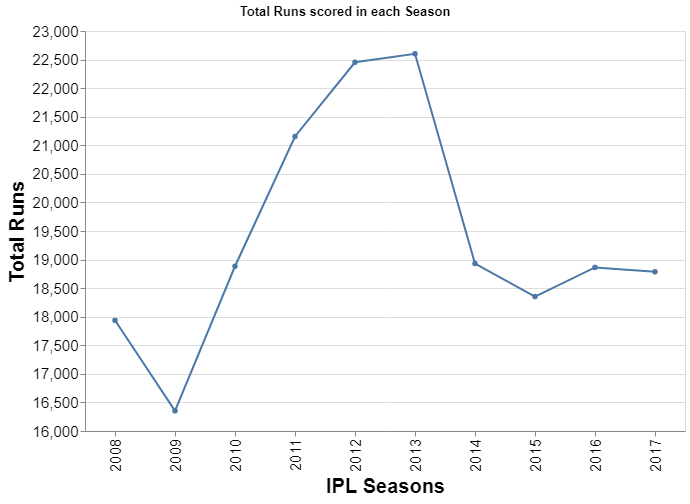

In [63]:
# Runs across the Seasons
alt.Chart(runsBySeason).mark_line(point=True).encode(
    alt.X('season:N', axis=alt.Axis(title='IPL Seasons')),
    alt.Y('total_runs:Q', scale=alt.Scale(zero=False),axis=alt.Axis(title='Total Runs')),
#     color=alt.Color('season', scale=alt.Scale(scheme='viridis')),
    tooltip=['season', alt.Tooltip('total_runs', title='Runs Scored')]
    ).configure_axis(
    domainWidth=1,
    labelFontSize=15,
    titleFontSize=20
).properties(height=400, width=600, title='Total Runs scored in each Season').interactive()


# Average runs scored in each season

In [73]:
# Average runs scored in each Season
avgRuns = matches.groupby(['season']).count().id.reset_index()
avgRuns.rename(columns={'id':'num_matches'}, inplace=True)
avgRuns['total_runs'] = runsBySeason['total_runs']
avgRuns['avg_runs_this_season']=avgRuns['total_runs']/avgRuns['num_matches']


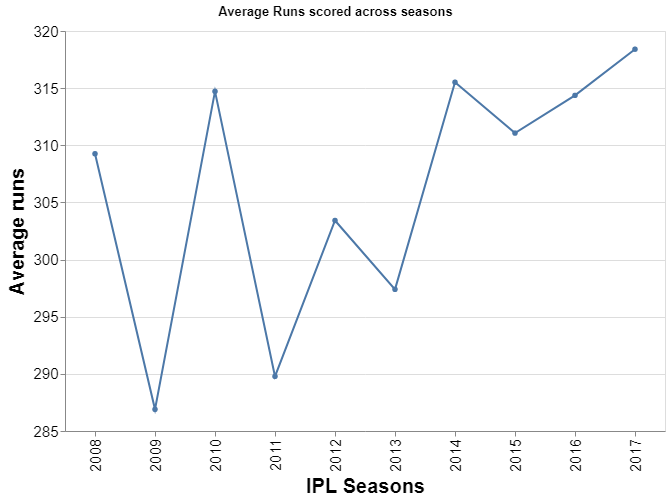

In [74]:
alt.Chart(avgRuns).mark_line(point=True).encode(
    alt.X('season:N', scale=alt.Scale(zero=False), axis=alt.Axis(title='IPL Seasons')),
    alt.Y('avg_runs_this_season:Q', scale=alt.Scale(zero=False), axis=alt.Axis(title='Average runs')),
    tooltip=['season', alt.Tooltip('avg_runs_this_season', title='Average Runs')]
    ).configure_axis(
        domainWidth=1,
        labelFontSize=15,
        titleFontSize=20
        ).properties(height=400, width=600, title='Average Runs scored across seasons').interactive()

In [75]:
# Below command is used to bypass the error
#[MaxRowsError: The number of rows in your dataset is greater than the maximum allowed (5000). 
# For information on how to plot larger datasets in Altair, see the documentation]

alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

# Boundaries scored in each IPL Season

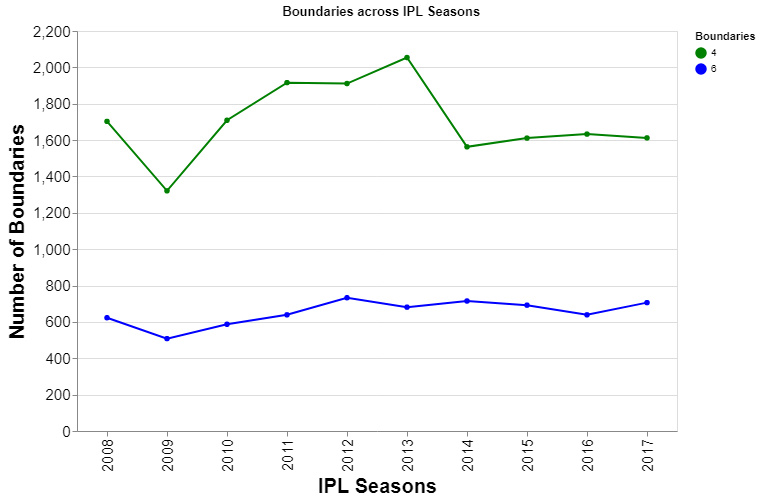

In [77]:
# Sixes and Fours Across the Season

boundaries = deliveries_by_season[(deliveries_by_season['batsman_runs'] == 4) | (deliveries_by_season['batsman_runs'] == 6)]

alt.Chart(boundaries).mark_line(point=True).encode(
    alt.X('season:N', axis=alt.Axis(title='IPL Seasons')),
    alt.Y('count()', axis=alt.Axis(title='Number of Boundaries')),
    color=alt.Color('batsman_runs:O', legend=alt.Legend(title='Boundaries'), scale=alt.Scale(domain=[4,6], range=['green', 'blue'])),
    tooltip=[alt.Tooltip('season',title='Season'), alt.Tooltip('count()', title='boundaries')]
).configure_axis(
    domainWidth=1,
    labelFontSize=15,
    titleFontSize=20
).properties(width=600, height=400, title='Boundaries across IPL Seasons').interactive()

# Favorite Grounds for IPL Matches

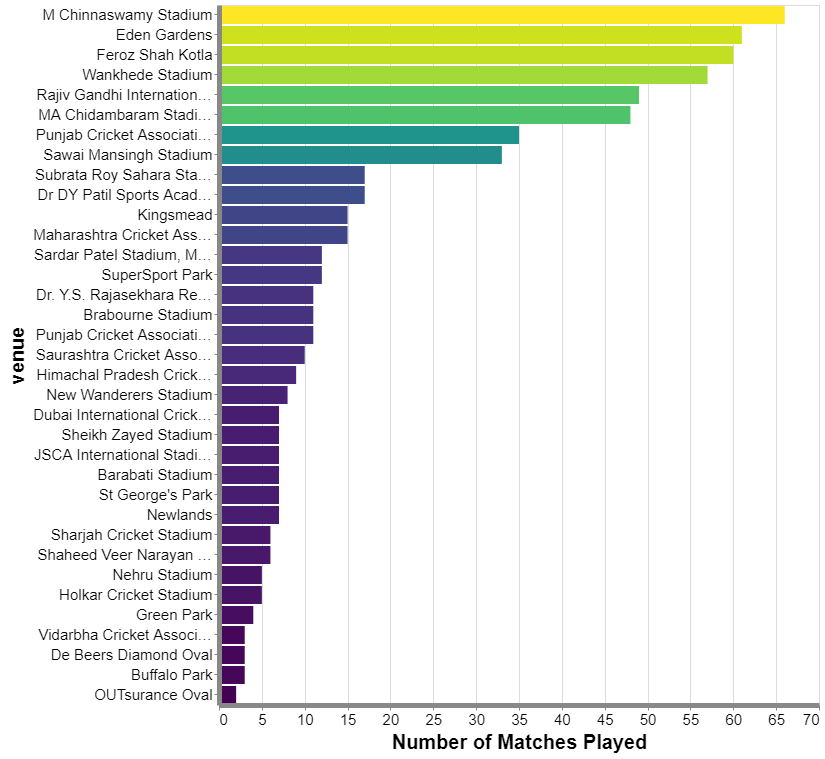

In [87]:
# Favorite Grounds
alt.Chart(matches).mark_bar().encode(
    alt.Y('venue:O', sort=alt.SortField(field='count():Q', op='count', order='descending')),
    alt.X('count():Q', axis=alt.Axis(title='Number of Matches Played')),
    color=alt.Color('count():Q', scale=alt.Scale(scheme='viridis'), legend=None),
    tooltip=[ alt.Tooltip('venue', title='Venue'), alt.Tooltip('city', title='City'), alt.Tooltip('count()', title='No. of Matches Played'), ]
    ).configure_axis(
    domainWidth=5,
    labelFontSize=15,
    titleFontSize=20
    ).properties(height=700, width=600).interactive()

# Who won maximum man of the match award

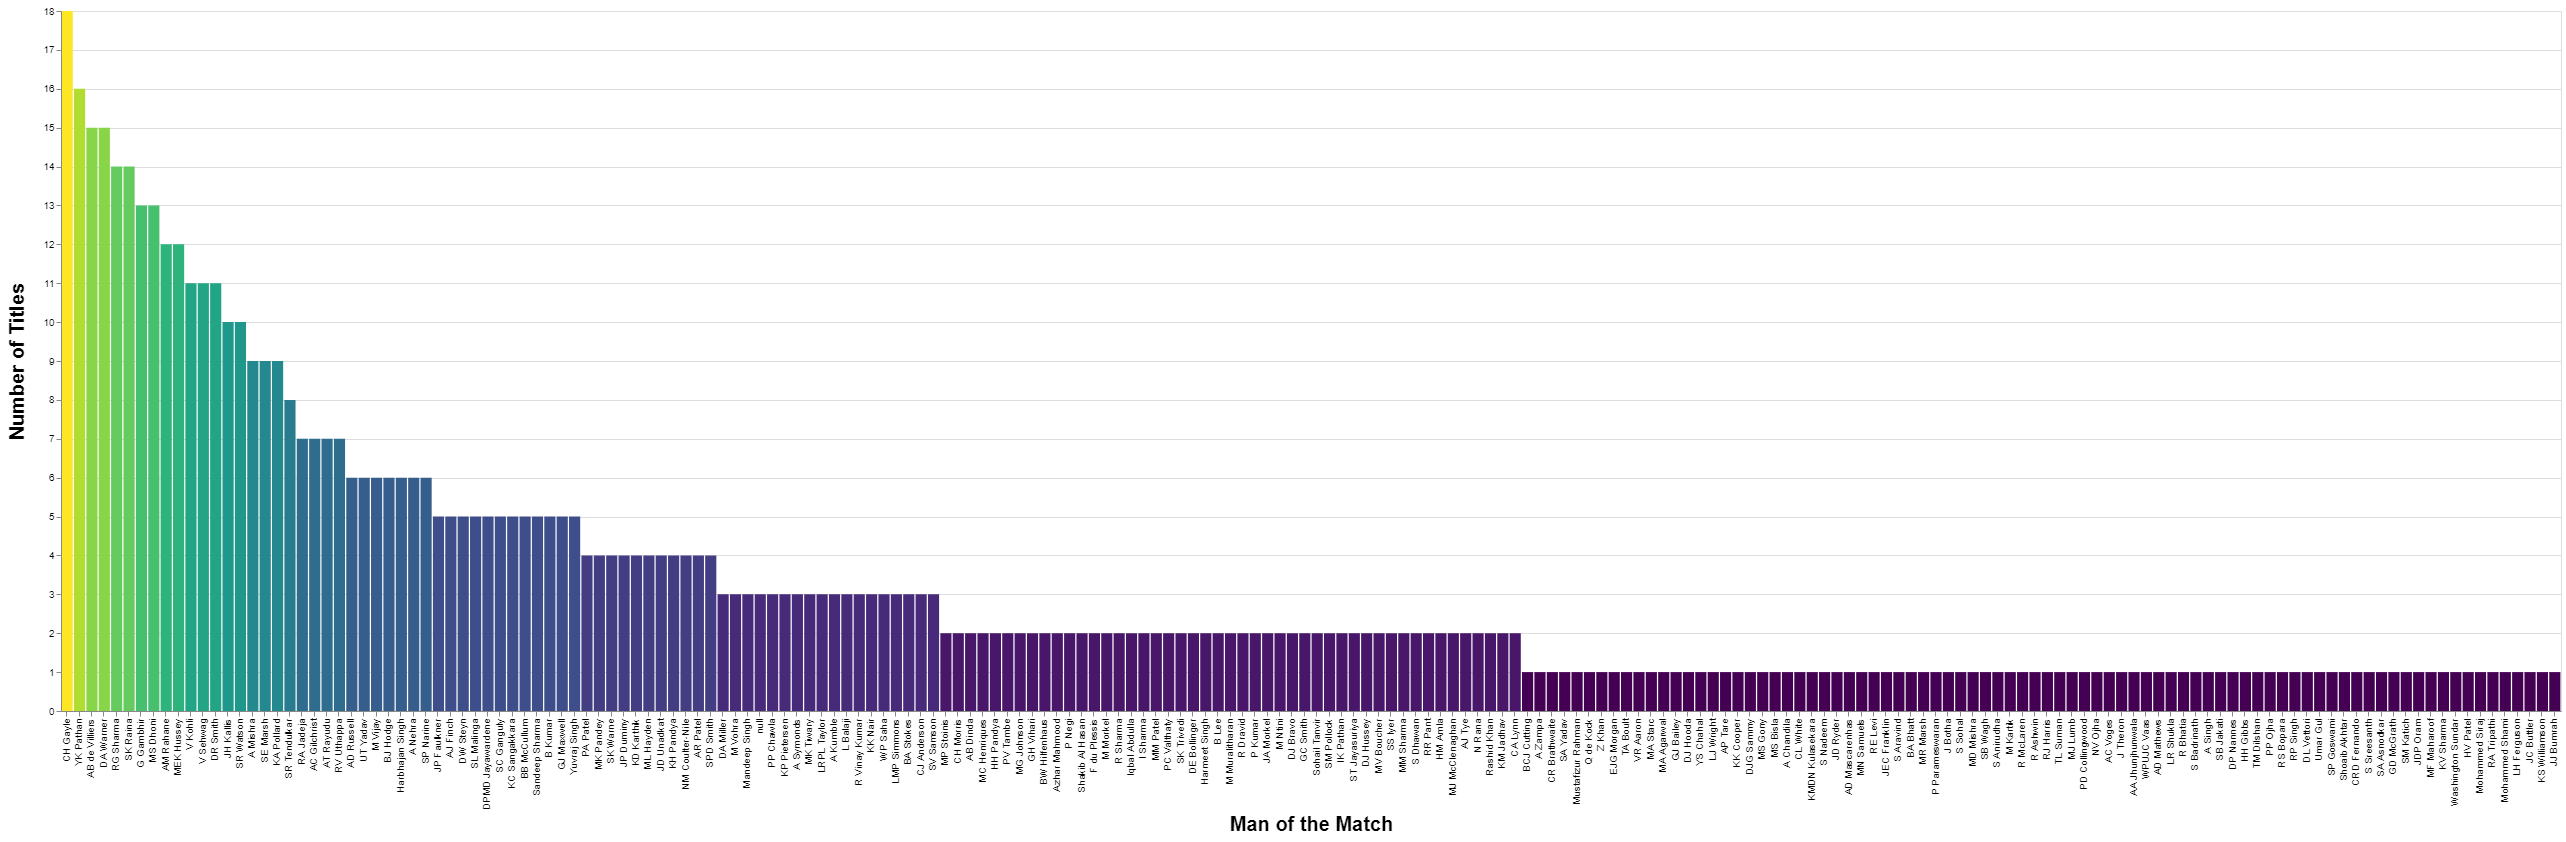

In [88]:
# Maximum Man Of Matches

alt.Chart(matches).mark_bar().encode(
    alt.Y('count():Q', axis=alt.Axis(title='Number of Titles')),
    alt.X('player_of_match:O', sort=alt.SortField(field='count():Q', op='count', order='descending'), axis=alt.Axis(title='Man of the Match')),
    alt.Color('count():Q', scale=alt.Scale(scheme='viridis'), legend=None),
#     x='season:N',
#     y='count():Q',
#     color=alt.Color('season:N', legend=None),
    tooltip=[alt.Tooltip('player_of_match:O', title='player'), alt.Tooltip('count():Q', title='number of titles')]
    ).configure_axis(
        domainWidth=1,
        titleFontSize=20).properties(height=700, width=2500).interactive()

In [89]:
top_20_players = matches['player_of_match'].value_counts().head(20).reset_index()
top_20_players.columns=('Player', 'Number_of_Titles')


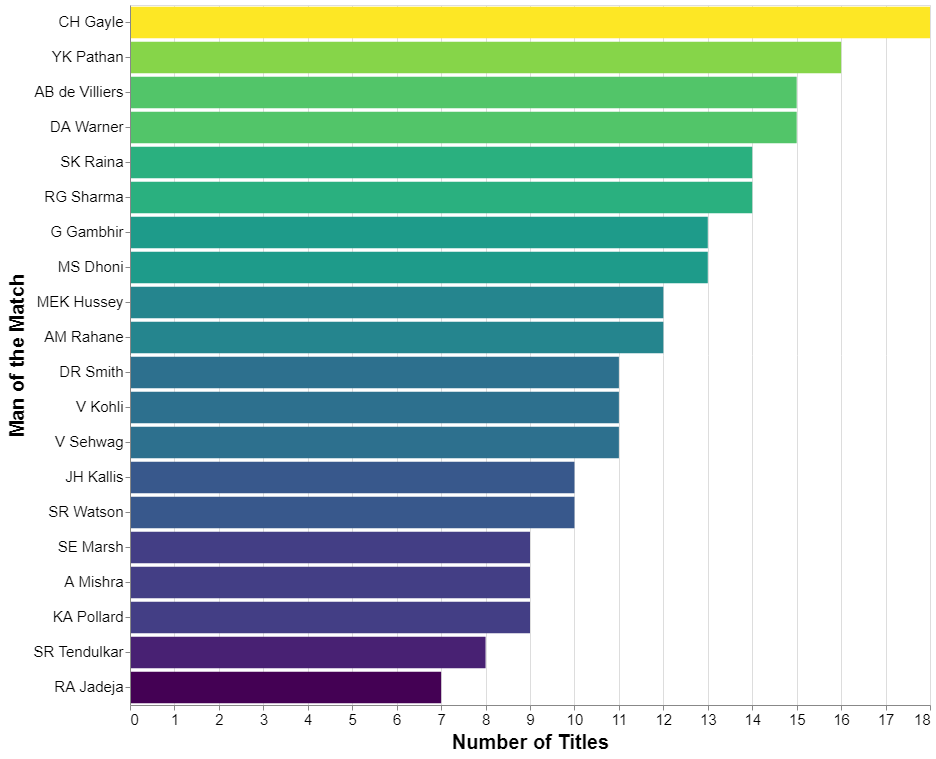

In [103]:
# top 20 "man of the match" winners


alt.Chart(top_20_players).mark_bar().encode(
    alt.X('Number_of_Titles:Q', axis=alt.Axis(title='Number of Titles')),
    alt.Y('Player:O', sort=alt.SortField(field='count():Q', op='count', order='ascending'), axis=alt.Axis(title='Man of the Match')),
    alt.Color('Number_of_Titles:Q', scale=alt.Scale(scheme='viridis'), legend=None),
#     x='season:N',
#     y='count():Q',
#     color=alt.Color('season:N', legend=None),
    tooltip=['Player:O', 'Number_of_Titles:Q',]
    ).configure_axis(
        domainWidth=1,
        labelFontSize=15,
        titleFontSize=20).properties(height=700, width=800).interactive()

# Top Batsmen 

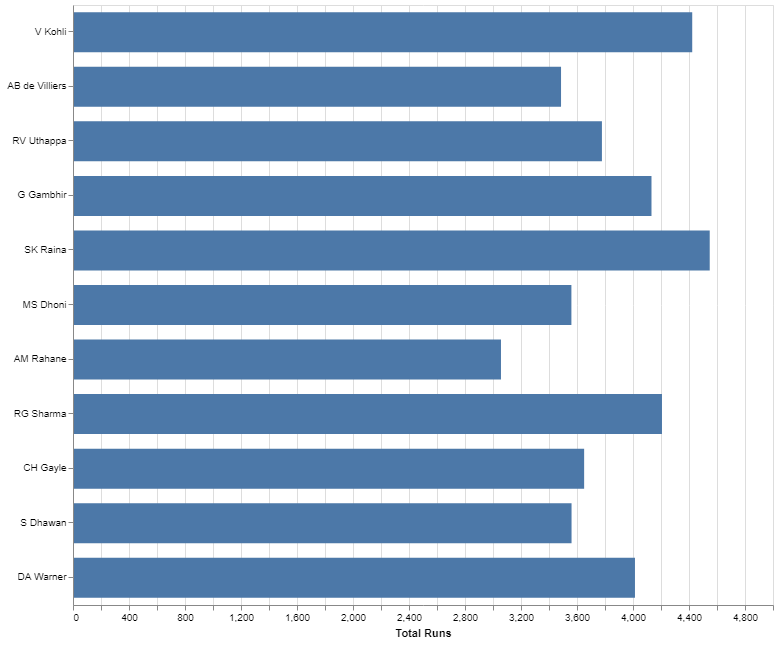

In [105]:
# Top Batsmen
# Batsmen who have scored more than 3000 runs in IPL 
from altair.expr import datum
alt.Chart(deliveries).transform_aggregate(
        total_runs='sum(batsman_runs):Q',
        groupby=['batsman']
    ).transform_filter(
        datum.total_runs > 3000
    ).mark_bar(size=40).encode(
    alt.Y('batsman', sort=alt.SortField(field='total_runs:Q', op='count', order='descending'), axis=alt.Axis(title="")),
    alt.X('total_runs:Q', sort=alt.SortField(field='total_runs:Q', op='count', order='descending'), axis=alt.Axis(title="Total Runs")),
    tooltip=[alt.Tooltip('batsman', title='Batsman'),alt.Tooltip( 'total_runs', title='Runs Scored')]
).properties(height=600, width=700).interactive(bind_x=False)
